# Aplicação de Lógica Fuzzy com Python: Exemplo das gorgetas

**Antecedentes (entradas)**

Serviço: que nota você daria para o serviço, em uma escala de 0 a 10?
- ruim, aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?
- ruim, boa, saborosa

**Consequentes (saídas)**

Gorjeta: quanta gorjeta você daria, entre 0% e 20%?
- baixa, média, alta

Regras
- Se a qualidade da comida for *ruim* ou o serviço for *ruim* então a gorjeta será *baixa*
- Se o serviço for *médio* então a gorjeta será *média*
- Se o serviço for *bom* e a qualidade da comida for *saborosa* então a gorjeta será *alta*


# Instalação e importação das bibliotecas

- Documentação: https://pythonhosted.org/scikit-fuzzy/overview.html

In [23]:
!pip install scikit-fuzzy
#!pip install scikit-fuzzy == 0.4.2

In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedentes e consequente

In [25]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [26]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [27]:
qualidade

Antecedent: qualidade

In [28]:
qualidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [29]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

In [30]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Membership functions

In [31]:
qualidade.automf(number = 3, names = ['ruim', 'boa', 'saborosa'])
servico.automf(number = 3, names = ['ruim', 'aceitável', 'ótimo'])

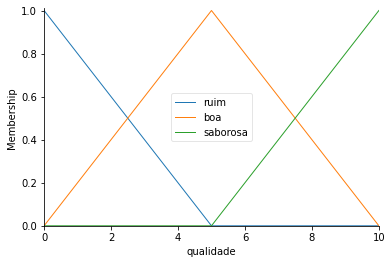

In [32]:
qualidade.view()

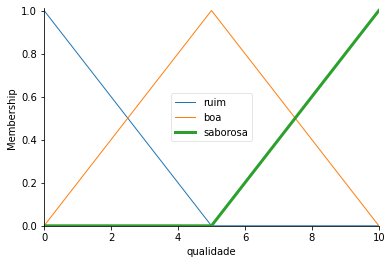

In [33]:
qualidade['saborosa'].view()

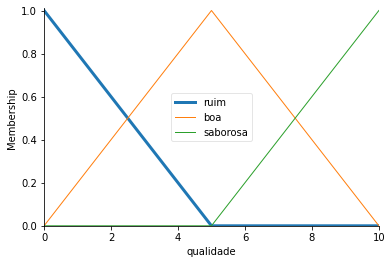

In [34]:
qualidade['ruim'].view()

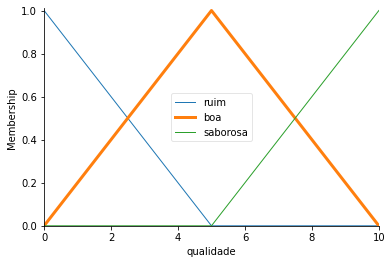

In [35]:
qualidade['boa'].view()

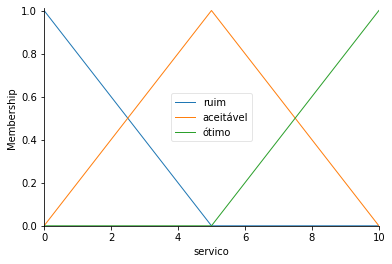

In [36]:
servico.view()

In [37]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [38]:
# função triangular
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 10])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [0, 10, 20])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [10, 20, 20])

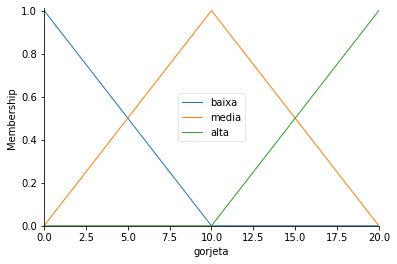

In [39]:
gorjeta.view()

In [40]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

## Sistema de controle

In [41]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [42]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [49]:
sistema.input['qualidade'] = 7
sistema.input['servico'] = 1
sistema.compute()

8.507936507936506


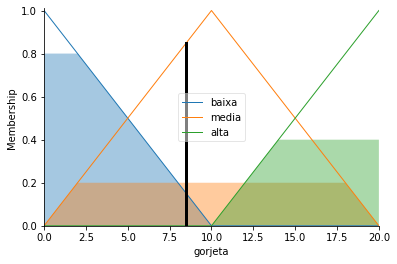

In [50]:
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)

# Outras funções

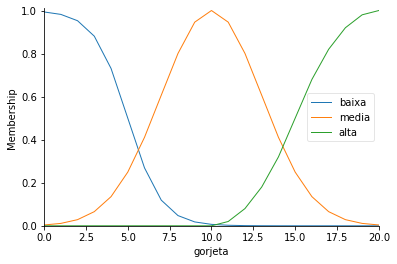

In [51]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21)
gorjeta.view()

In [ ]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

In [ ]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [ ]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
sistema.input['qualidade'] = 1
sistema.input['servico'] = 1
sistema.compute()

5.662380878042331


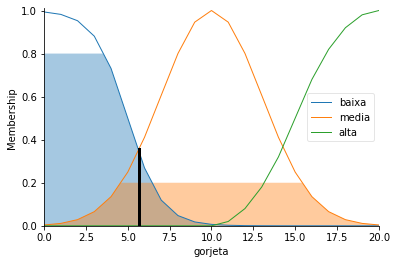

In [ ]:
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)